In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
train = pd.read_excel('CustomerDemographic table.xlsx')
train.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
train.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [4]:
train['last_name']=train['last_name'].fillna(method='ffill')

In [5]:
train['DOB']=train['DOB'].fillna(method='ffill')

In [6]:
train['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Account Representative II                4
Research Assistant III                   3
Health Coach I                           3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [7]:
train['job_title']=train['job_title'].fillna(method='bfill')

In [8]:
train['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [9]:
train['job_industry_category']=train['job_industry_category'].fillna(method='ffill')

In [10]:
del train['default']

In [11]:
train['tenure'].mean()


10.65704063378482

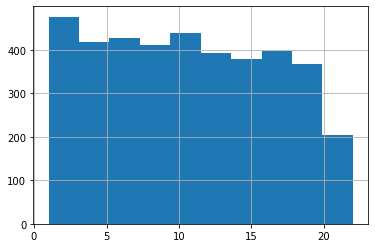

In [12]:
train['tenure'].hist()

In [13]:
train['tenure']=train['tenure'].fillna(train['tenure'].mean())

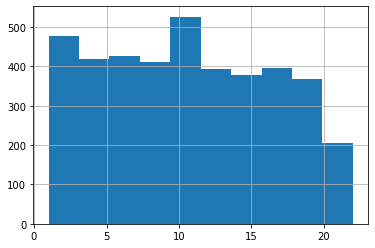

In [14]:
train['tenure'].hist()

In [15]:
train.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0


In [16]:
submission = pd.DataFrame({
        "customer_id": train["customer_id"],
        "first_name": train["first_name"],
        "last_name": train["last_name"],
        "gender": train["gender"],
        "past_3_years_bike_related_purchases": train["past_3_years_bike_related_purchases"],
        "DOB": train["DOB"],
        "job_title": train["job_title"],
        "job_industry_category": train["job_industry_category"],
        "wealth_segment": train["wealth_segment"],
        "deceased_indicator": train["deceased_indicator"],
        "owns_car": train["owns_car"],
        "tenure": train["tenure"]
    })
submission.to_csv('./submission.csv', index=False)
print(submission.head(10))

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot     Dearle    Male   
4            5  Sheila-kathryn     Calton  Female   
5            6            Curr  Duckhouse    Male   
6            7            Fina     Merali  Female   
7            8             Rod      Inder    Male   
8            9            Mala       Lind  Female   
9           10        Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
3                                   33 1961-10-03   
4                                   56 1977-05-13   
5                                   35 1966-09-16   
6                                    6 1976-0